# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data
The images we're working with are from the Foo101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to use only two classes (🍕 & 🥩) using the image modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure out, what works (or better yet what doesn't work) before scaling up.

In [1]:
# Preprocessed dataset: https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
import os

# walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 3 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak'.
There are 2 directories and 0 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\test'.
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\test\steak'.
There are 2 directories and 0 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\train'.
There are 0 directories and 750 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\train\steak'.


In [3]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [4]:
# Get classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
    # Created a list of class_names from the subdiretories
print(class_names)

['pizza' 'steak']


In [5]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    # Show the shape of the image
    print(f"Image shape: {img.shape}") 

    return img

['3082068.jpg']
Image shape: (318, 512, 3)


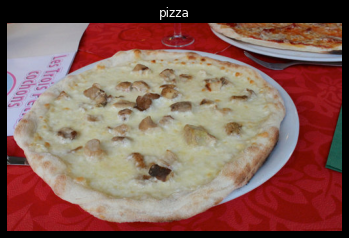

In [6]:
# View random image from the training dataset
img = view_random_image(
    target_dir="pizza_steak/train/", 
    target_class="pizza")

In [7]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(318, 512, 3), dtype=uint8, numpy=
array([[[144,  61,  57],
        [146,  65,  62],
        [149,  74,  71],
        ...,
        [123,  97,  82],
        [117,  94,  76],
        [125, 103,  82]],

       [[155, 129, 114],
        [156, 133, 119],
        [157, 135, 121],
        ...,
        [130,  94,  70],
        [124,  80,  53],
        [130,  85,  52]],

       [[160, 150, 138],
        [160, 152, 139],
        [159, 151, 140],
        ...,
        [116,  66,  39],
        [121,  61,  24],
        [138,  71,  28]],

       ...,

       [[153,  23,  33],
        [148,  18,  26],
        [158,  28,  36],
        ...,
        [123,  10,   4],
        [122,   9,   3],
        [123,  10,   6]],

       [[161,  31,  41],
        [154,  24,  34],
        [159,  32,  39],
        ...,
        [127,  13,  13],
        [126,  12,  12],
        [127,  13,  13]],

       [[157,  25,  38],
        [152,  22,  32],
        [154,  27,  36],
        ...,
        [134,  19,  2

In [8]:
# View the image shape
img.shape # returns width, height, colour channels

(318, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (sind 255 is the maximum pixel value.)

In [9]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.56470588, 0.23921569, 0.22352941],
        [0.57254902, 0.25490196, 0.24313725],
        [0.58431373, 0.29019608, 0.27843137],
        ...,
        [0.48235294, 0.38039216, 0.32156863],
        [0.45882353, 0.36862745, 0.29803922],
        [0.49019608, 0.40392157, 0.32156863]],

       [[0.60784314, 0.50588235, 0.44705882],
        [0.61176471, 0.52156863, 0.46666667],
        [0.61568627, 0.52941176, 0.4745098 ],
        ...,
        [0.50980392, 0.36862745, 0.2745098 ],
        [0.48627451, 0.31372549, 0.20784314],
        [0.50980392, 0.33333333, 0.20392157]],

       [[0.62745098, 0.58823529, 0.54117647],
        [0.62745098, 0.59607843, 0.54509804],
        [0.62352941, 0.59215686, 0.54901961],
        ...,
        [0.45490196, 0.25882353, 0.15294118],
        [0.4745098 , 0.23921569, 0.09411765],
        [0.54117647, 0.27843137, 0.10980392]],

       ...,

       [[0.6       , 0.09019608, 0.12941176],
        [0.58039216, 0.07058824, 0.10196078],
        [0.61960784, 0

## AN end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called as scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    seed=42)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # This layer actually is the same as the one above
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 30s 445ms/step - loss: 0.5786 - accuracy: 0.6947 - val_loss: 0.4092 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 7s 154ms/step - loss: 0.4101 - accuracy: 0.8120 - val_loss: 0.3389 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 7s 145ms/step - loss: 0.3909 - accuracy: 0.8313 - val_loss: 0.3986 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 7s 156ms/step - loss: 0.3741 - accuracy: 0.8393 - val_loss: 0.3286 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 6s 137ms/step - loss: 0.3200 - accuracy: 0.8700 - val_loss: 0.3122 - val_accuracy: 0.8720


🔑 **Note:** If the above cell is taking longer than ~10s per Epoch, make sure to use a GPU.

In [11]:
# Get a model summary 
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

🛠️ **Practice/Exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/ 

## Using the same model as before

Let's replicate the model we've build in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.43089&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 7s 152ms/step - loss: 1.1414 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 157ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 163ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 147ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [13]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... Let's try to improve it.

In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 7s 147ms/step - loss: 2.8754 - accuracy: 0.6493 - val_loss: 0.5918 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.7499 - accuracy: 0.7033 - val_loss: 0.7276 - val_accuracy: 0.7140
Epoch 3/5
47/47 [==============================] - 8s 167ms/step - loss: 0.7005 - accuracy: 0.7200 - val_loss: 0.8311 - val_accuracy: 0.5800
Epoch 4/5
47/47 [==============================] - 7s 157ms/step - loss: 0.5995 - accuracy: 0.7573 - val_loss: 0.6162 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 7s 159ms/step - loss: 0.4457 - accuracy: 0.8040 - val_loss: 0.6802 - val_accuracy: 0.7400


In [15]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles od model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out an learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Binary Classification: Let's break it down

1. Become one with the data (viszualize, viszualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline) (e.g. 101 food paper)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2437268.jpg']
Image shape: (512, 512, 3)
['350358.jpg']
Image shape: (512, 384, 3)


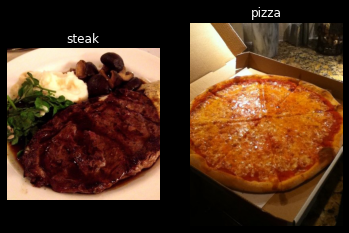

In [17]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [18]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than looking at 10 thousands of images at one time, a model might only look at e.g. 32 images at one time to find patterns.
It does this for a couple of reasons:
1. 10 thousands (or more) images might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10 thousands images in one hit, could result in the model not beaing able to learn very well.

Why 32?

Because 32 is good for your health...: https://twitter.com/ylecun/status/989610208497360896?s=20

In [19]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
# ImageDataGenerator: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [20]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [22]:
# How many batches are there?
len(train_data)

47

In [23]:
1500/32

46.875

In [24]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [25]:
images[7], images[7].shape

(array([[[0.30588236, 0.17254902, 0.227451  ],
         [0.34901962, 0.21960786, 0.25490198],
         [0.4039216 , 0.2784314 , 0.2901961 ],
         ...,
         [0.16470589, 0.02745098, 0.1137255 ],
         [0.16862746, 0.01960784, 0.10980393],
         [0.15686275, 0.00784314, 0.10588236]],
 
        [[0.28235295, 0.14901961, 0.20392159],
         [0.34117648, 0.21176472, 0.24705884],
         [0.42352945, 0.29803923, 0.30980393],
         ...,
         [0.17254902, 0.02352941, 0.1137255 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16078432, 0.01176471, 0.10980393]],
 
        [[0.2627451 , 0.13725491, 0.19607845],
         [0.3254902 , 0.20000002, 0.24313727],
         [0.41960788, 0.29803923, 0.31764707],
         ...,
         [0.19215688, 0.04313726, 0.1254902 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16862746, 0.03137255, 0.1254902 ]],
 
        ...,
 
        [[0.62352943, 0.5803922 , 0.5568628 ],
         [0.6039216 , 0.56078434, 0.53725

In [26]:
# View the fir batch labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result, that you setup when beginning a machine learning experiment, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [27]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [28]:
# Create the model (this will be our baseline, a three layer convolutional neural network)
model_4 = Sequential([
    Conv2D(
        filters=10, # Filters is the number of sliding windows going across an input (higher = more complex model)
        kernel_size=3, # The size of the sliding window going across an input
        strides=1, # Default = valid; The size of the step the sliding window takes across an input
        padding="valid", # Default = valid; if "same", output shape is same as input shape, if "valid", output shape gets compressed
        activation="relu",
        input_shape=(224, 224, 3) # input layer (specify input shape)
    ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification, so only one outpur neuron)
])

> 🛠️ **Practive:** Understand what's going on in a Conv2D layer by going through the CNN explainer website https://poloclub.github.io/cnn-explainer/

In [29]:
# Compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [30]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [32]:
# Fit the model
history_4 = model_4.fit(
    train_data, # this is a combination of labels and sample data
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 9s 173ms/step - loss: 1.0753 - accuracy: 0.6793 - val_loss: 0.4536 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 8s 161ms/step - loss: 0.4394 - accuracy: 0.8153 - val_loss: 0.3762 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 8s 166ms/step - loss: 0.3284 - accuracy: 0.8740 - val_loss: 0.3983 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 8s 162ms/step - loss: 0.1813 - accuracy: 0.9413 - val_loss: 0.4198 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 8s 164ms/step - loss: 0.0705 - accuracy: 0.9800 - val_loss: 0.5865 - val_accuracy: 0.7940


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

<AxesSubplot:>

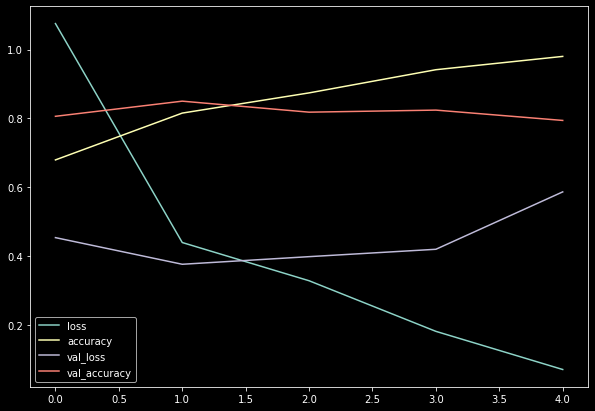

In [33]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [34]:
# Plot the validation and training curves separatly
def plot_loss_curves(history):
    """
    Returns seperate loss curves for training and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) # how many epochs did we run for?

    # Plot loss
    plt.figure()
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset _too well_ and thus the model's ability to generalize to unseen data will be diminished.

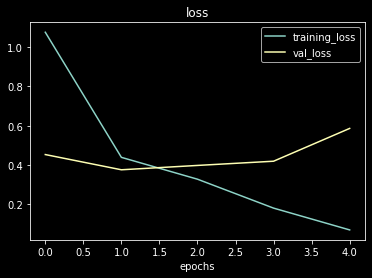

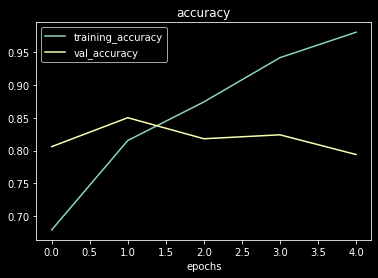

In [35]:
# Checke out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data ...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [36]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [37]:
# Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [38]:
# Fit the model
history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 8s 158ms/step - loss: 0.6277 - accuracy: 0.6327 - val_loss: 0.5229 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 7s 156ms/step - loss: 0.4804 - accuracy: 0.7733 - val_loss: 0.3793 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4232 - accuracy: 0.8127 - val_loss: 0.3482 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 8s 162ms/step - loss: 0.4241 - accuracy: 0.8240 - val_loss: 0.5100 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 7s 158ms/step - loss: 0.4130 - accuracy: 0.8187 - val_loss: 0.3218 - val_accuracy: 0.8680


In [39]:
# Get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

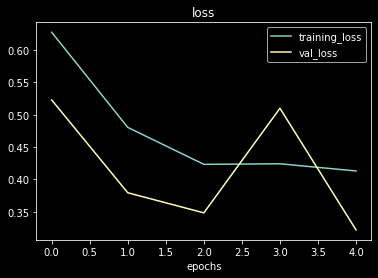

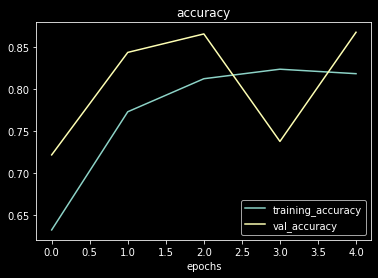

In [40]:
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmentation

In [41]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True
)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [42]:
# Import data and augment it from training directory
print("Augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False # for demonstration purposes only
)

# Create non-augmented train data batches
print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32,
    shuffle=False
)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentaion is usually only performed on the training data. Using 'ImageDataGenerator' built-in data augmentaion parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [43]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels are not augmented, just images

Showing image number: 30


(-0.5, 223.5, 223.5, -0.5)

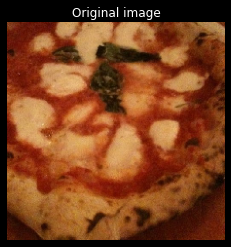

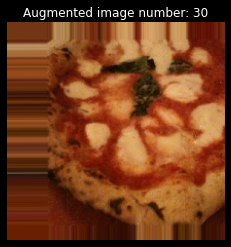

In [44]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # our batch_size is 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image number: {random_number}")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [45]:
# Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_6 = model_6.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 19s 398ms/step - loss: 0.7024 - accuracy: 0.4047 - val_loss: 0.6879 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 19s 396ms/step - loss: 0.6996 - accuracy: 0.5680 - val_loss: 0.6774 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 19s 412ms/step - loss: 0.6944 - accuracy: 0.5387 - val_loss: 0.6822 - val_accuracy: 0.6880
Epoch 4/5
47/47 [==============================] - 20s 420ms/step - loss: 0.7237 - accuracy: 0.5080 - val_loss: 0.6871 - val_accuracy: 0.5040
Epoch 5/5
47/47 [==============================] - 20s 418ms/step - loss: 0.6913 - accuracy: 0.5647 - val_loss: 0.6869 - val_accuracy: 0.5660


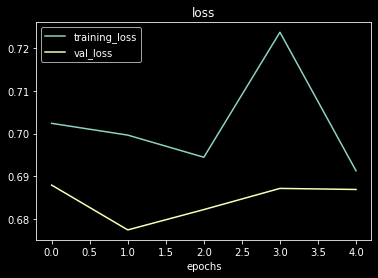

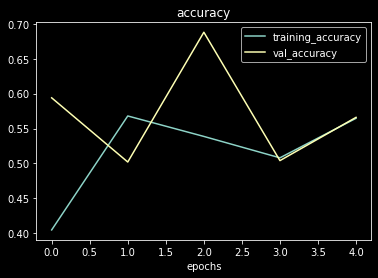

In [46]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [47]:
# Import data and augment it and shuffle from traning directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32,
    shuffle=True
)

Found 1500 images belonging to 2 classes.


In [48]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile
model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# Fit
history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 21s 435ms/step - loss: 0.6657 - accuracy: 0.6073 - val_loss: 0.7254 - val_accuracy: 0.5700
Epoch 2/5
47/47 [==============================] - 20s 415ms/step - loss: 0.6102 - accuracy: 0.6793 - val_loss: 0.4949 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 18s 378ms/step - loss: 0.5462 - accuracy: 0.7347 - val_loss: 0.4242 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 19s 410ms/step - loss: 0.4926 - accuracy: 0.7713 - val_loss: 0.3618 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 20s 419ms/step - loss: 0.4947 - accuracy: 0.7713 - val_loss: 0.3361 - val_accuracy: 0.8660


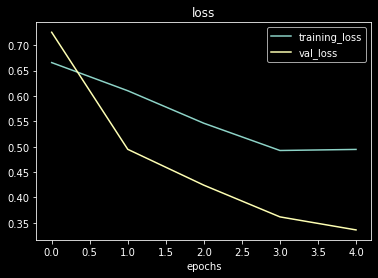

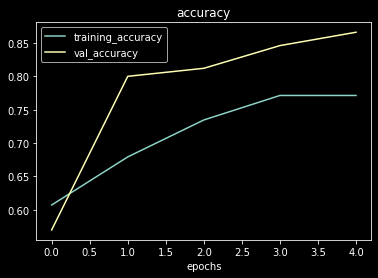

In [49]:
# Plot loss curves
plot_loss_curves(history_7)

> 🔑 **Note:** When shuffling training data, the model gets epxosed to all different kinds of data during, training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've allready beaten our baseline, ther are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D`layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

> 🛠️ **Pratice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [50]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [51]:
# View our example image
import matplotlib.image as mpimg
steak = mpimg.imread("C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak/steak_custom.jpg")

In [52]:
# Check the shape of our image
steak.shape

(316, 474, 3)

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [53]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_pred_image(filename, img_shape=224):
    """Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)"""  
    # Read in the image
    img = tf.io.read_file(filename=filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 & 1)
    img = img/255.
    return img

In [54]:
# Load in and preprocess our custom image
steak = load_and_pred_image("pizza_steak/steak_custom.jpg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.79966736, 0.8075105 , 0.8545693 ],
        [0.7779588 , 0.78580195, 0.83286077],
        [0.7787815 , 0.7866246 , 0.83368343],
        ...,
        [0.55444676, 0.56621146, 0.59366244],
        [0.55444676, 0.56621146, 0.59366244],
        [0.5686275 , 0.5803922 , 0.60784316]],

       [[0.78860295, 0.7964461 , 0.8435049 ],
        [0.76736647, 0.7752096 , 0.8222684 ],
        [0.76771706, 0.7755602 , 0.822619  ],
        ...,
        [0.5354342 , 0.5471989 , 0.56981796],
        [0.5354342 , 0.5471989 , 0.56981796],
        [0.5517157 , 0.5634804 , 0.58609945]],

       [[0.7776436 , 0.78548676, 0.8325456 ],
        [0.75546294, 0.7633061 , 0.8103649 ],
        [0.75675774, 0.7646009 , 0.8116597 ],
        ...,
        [0.51756406, 0.52911866, 0.5487265 ],
        [0.5176813 , 0.5292359 , 0.54884374],
        [0.5372549 , 0.5488095 , 0.5684174 ]],

       ...,

       [[0.6472452 , 0.65900993, 0.69430405],
        [0.65

In [55]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.6163796]], dtype=float32)

Looks like our custom model is being out through our model, however, it currently outputs a prediction probability. Wouldn't it be nice to visualize the image as well as the model's prediction?

In [56]:
# Remind ourselvesof our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [57]:
# We can index the predicted class by rounding the prediction probabilit and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [58]:
def pred_and_plot(model, filename, class_names=class_names):
    """Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title."""
    # Import the target image and preprocess it
    img = load_and_pred_image(filename)
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)    

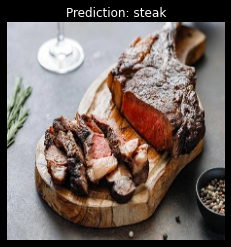

In [59]:
# Test our model on a custom image
pred_and_plot(model_7, "pizza_steak/steak_custom.jpg")

Our model works! Let's try it on another image... This time pizza 🍕

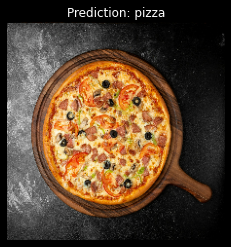

In [60]:
# Make another prediction
pred_and_plot(model_7, "pizza_steak/pizza_custom.jpg")

## Multiclass image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multiclass classification)
1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with baseline)
4. Fit the model (overfit to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

Data has allready been prepared for this course.
See also https://github.com/mrdbourke/tensorflow-deep-learning/tree/main/extras


In [62]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/10_food_classes"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 1 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/10_food_classes'
There are 10 directories and 0 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/10_food_classes\test'
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/10_food_classes\test\chicken_curry'
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/10_food_classes\test\chicken_wings'
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/10_food_classes\test\fried_rice'
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/10_food_classes\test\grilled_salmon'
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/10_food_classes\test\hamburger'
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/10_food_classes\test\ice_cream

In [65]:
# Setup the train and test directories
train_dir = "10_food_classes/train/"
test_dir = "10_food_classes/test/"

In [67]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1399531.jpg']
Image shape: (384, 512, 3)


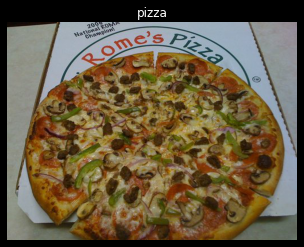

In [97]:
# Visualize, visualize, visualize
import random
img = view_random_image(
    target_dir=train_dir,
    target_class=random.choice(class_names)
)

### 2. Preprocess the data (prepare it for a model)

In [102]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website...
How about we just take their model (also on 10 classes) and use it for our problem...

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [109]:
# Build the model
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),        
    Dense(10, activation="sigmoid")
])

# Compile the model
model_8.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

### 4. Train/Fit the model

In [116]:
# Fit the model
history_8 = model_8.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 32s 136ms/step - loss: 0.0715 - accuracy: 0.9825 - val_loss: 5.3789 - val_accuracy: 0.2584
Epoch 2/5
235/235 [==============================] - 37s 158ms/step - loss: 0.0464 - accuracy: 0.9887 - val_loss: 5.9137 - val_accuracy: 0.2788
Epoch 3/5
235/235 [==============================] - 34s 144ms/step - loss: 0.0181 - accuracy: 0.9965 - val_loss: 6.5734 - val_accuracy: 0.2792
Epoch 4/5
235/235 [==============================] - 31s 133ms/step - loss: 0.0061 - accuracy: 0.9991 - val_loss: 6.9618 - val_accuracy: 0.2628
Epoch 5/5
235/235 [==============================] - 34s 144ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 5.9953 - val_accuracy: 0.2568


In [118]:
model_8.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 28090)           

In [119]:
len(train_data)

235

### 5. Evaluate the model

In [120]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 10s 119ms/step - loss: 5.9953 - accuracy: 0.2568


[5.995269298553467, 0.25679999589920044]

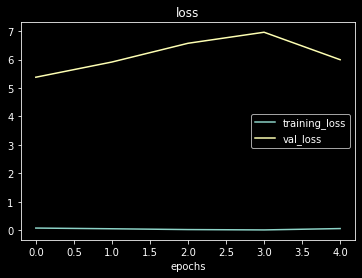

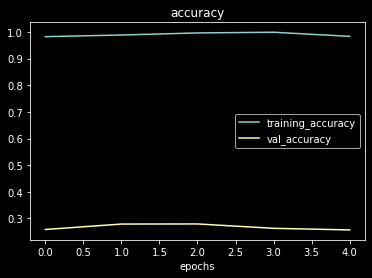

In [121]:
# Check out the model's loss curve
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but failes to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)